In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 

In [69]:
df = pd.read_excel("D:\MAX\case_study_data.xlsx")
df.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


# Not Null Values

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [71]:
#Removing outliers- age
df = df[df['age']<=100]

In [72]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [73]:
df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'svaing_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [74]:
#checkin_acc
df = df.merge(pd.get_dummies(df.checkin_acc, drop_first=True, prefix='checkin_acc'), left_index=True, right_index=True)

#credit_history
df = df.merge(pd.get_dummies(df.credit_history, drop_first=True, prefix='credit_history'), left_index=True, right_index=True)

#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df.purpose, drop_first=True, prefix='purpose'), left_index=True, right_index=True)

#svaing_acc
df = df.merge(pd.get_dummies(df.svaing_acc, drop_first=True, prefix='svaing_acc'), left_index=True, right_index=True)

#present_emp_since
df = df.merge(pd.get_dummies(df.present_emp_since, drop_first=True, prefix='present_emp_since'), left_index=True, right_index=True)

#personal_status
df = df.merge(pd.get_dummies(df.personal_status, drop_first=True, prefix='personal_status'), left_index=True, right_index=True)

#other_debtors
df = df.merge(pd.get_dummies(df.other_debtors, drop_first=True, prefix='other_debtors'), left_index=True, right_index=True)

#property
df = df.merge(pd.get_dummies(df.property, drop_first=True, prefix='property'), left_index=True, right_index=True)

#inst_plans
df = df.merge(pd.get_dummies(df.inst_plans, drop_first=True, prefix='inst_plans'), left_index=True, right_index=True)

#housing
df = df.merge(pd.get_dummies(df.housing, drop_first=True, prefix='housing'), left_index=True, right_index=True)

#job
df = df.merge(pd.get_dummies(df.job, drop_first=True, prefix='job'), left_index=True, right_index=True)

#telephone
df = df.merge(pd.get_dummies(df.telephone, drop_first=True, prefix='telephone'), left_index=True, right_index=True)

#foreign_worker
df = df.merge(pd.get_dummies(df.foreign_worker, drop_first=True, prefix='foreign_worker'), left_index=True, right_index=True)

In [75]:
#Excluding the missing columns
del df["checkin_acc"]
del df["credit_history"]
del df["purpose"]
del df["svaing_acc"]
del df["present_emp_since"]
del df["personal_status"]
del df["other_debtors"]
del df['property']
del df['inst_plans']
del df['housing']
del df['job']
del df['telephone']
del df['foreign_worker']

In [76]:
df

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
1,72,8927,3,3,33,2,2,2,1,0,...,0,0,1,1,0,0,1,0,0,0
2,18,3144,3,5,74,2,3,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,63,11823,3,6,68,2,3,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,36,7305,5,6,80,3,3,2,0,0,...,1,0,1,0,1,0,1,0,0,0
5,54,13583,3,6,53,2,3,1,0,0,...,1,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
996,45,5786,6,6,60,2,2,1,0,0,...,0,0,1,1,0,0,0,1,1,0
997,18,1206,6,6,57,2,2,1,0,0,...,0,0,1,1,0,0,1,0,0,0
998,68,2768,6,6,35,2,2,2,0,0,...,1,0,1,0,1,0,1,0,1,0


In [77]:
#Replace value of status from 1 & 2 to 0 &1  , to remove bias

df['status'] =  df['status'] -1
df.head(15)

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
1,72,8927,3,3,33,2,2,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,18,3144,3,5,74,2,3,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,63,11823,3,6,68,2,3,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,36,7305,5,6,80,3,3,1,0,0,...,1,0,1,0,1,0,1,0,0,0
5,54,13583,3,6,53,2,3,0,0,0,...,1,0,1,0,1,1,0,0,1,0
6,36,4253,5,6,80,2,2,0,0,0,...,0,0,1,1,0,0,1,0,0,0
7,54,10422,3,3,53,2,2,0,1,0,...,0,0,1,0,0,0,0,1,1,0
8,18,4589,3,6,92,2,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
9,45,7851,6,3,42,3,2,1,1,0,...,0,0,1,1,0,0,0,1,0,0
10,18,1943,5,2,38,2,2,1,1,0,...,0,0,1,0,0,0,1,0,0,0


# Correlation 

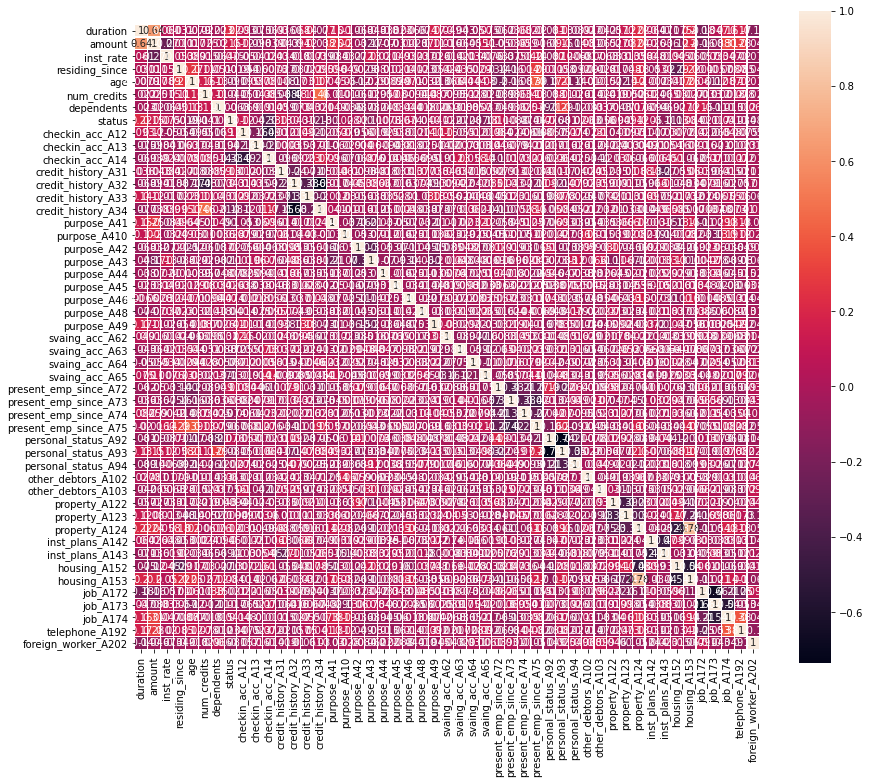

In [78]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [79]:
#Data Preprocessing

from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [80]:
# !pip install xgboost

In [81]:
#Log Transformation applied on the amount column

df['amount'] = np.log(df['amount'])

In [83]:
#Creating the X and y variables
X = df.drop('status', 1)
y = df["status"]

# MODEL  - TO identify probable defaulters from the data 



In [85]:
#Splitting the data Set 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score, precision_score,f1_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [86]:
def MLA_results(X , y):
    
    features_train,features_test,labels_train,labels_test =train_test_split(X,y,train_size=0.75, stratify =y)
    
    #DTClassifier
    from sklearn.tree import DecisionTreeClassifier 
    dtclf = DecisionTreeClassifier()
    dtclf.fit(features_train,labels_train)
    dtclf.score(features_test,labels_test)
    
    #SVM
    from sklearn import svm
    clf = svm.SVC(kernel="linear")
    clf.fit(features_train,labels_train)
    clf.score(features_test,labels_test)
    
    #Naive Bayes Classifier
    #from sklearn import naive_bayes
    #nbclf = naive_bayes.GaussianNB()
    
    #XGBoost
    from xgboost import XGBClassifier
    xgboost=XGBClassifier()
    
    xgboost.fit(features_train,labels_train)
    print(xgboost.score(features_test,labels_test))
    
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knnclf = KNeighborsClassifier(n_neighbors=2)
    knnclf.fit(features_train,labels_train)
    print(knnclf.score(features_test,labels_test))
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    clf1 = LogisticRegression()
    clf1.fit(features_train,labels_train)
    clf1.score(features_test,labels_test)
    
    algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","XGBoost"]
    clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),XGBClassifier()]
    result = []

    for clff in clfs:
        clff.fit(features_train,labels_train)
        acc = clff.score(features_test,labels_test)
        result.append(acc)
    result_df = pd.DataFrame(result,index=algos)
    result_df.columns=["Accuracy"]
    result_df.sort_values(by="Accuracy",ascending=False)
    
    #Cross Validation
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    kfold =KFold(n_splits=10)
    
    algos = ["Support Vector Machine","Decision Tree","Logistic Regression","K Nearest Neighbor","XGBoost"]
    clfs = [svm.SVC(kernel="linear"),DecisionTreeClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=2),XGBClassifier()]
    cv_results=[]
    for classifiers in clfs:
        cv_score = cross_val_score(classifiers,X,y,cv=kfold,scoring="accuracy")
        cv_results.append(cv_score.mean())
    cv_mean = pd.DataFrame(cv_results,index=algos)
    cv_mean.columns=["Accuracy"]
    cv_mean.sort_values(by="Accuracy",ascending=False)
    print(result_df)
    print("K-Fold Accuracy results",cv_mean)
    
    return result_df

In [87]:
#Hyper parameter tuning

def tuning_ML(X, y):
    
    # Splitting the data into training set and testset
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify =y)
    
    # Logistic Regression-----------------------------

    # Import library for LogisticRegression
    from sklearn.linear_model import LogisticRegression

    # Create a Logistic regression classifier
    logreg = LogisticRegression()

    # Train the model using the training sets 
    logreg.fit(X_train, y_train)
    
    # Prediction on test data
    y_pred = logreg.predict(X_test)
    
    # Calculating the accuracy
    acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    rec_logreg = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_logreg = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_logreg  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    print( 'Accuracy of Logistic Regression model : ', acc_logreg )
    
    # Gaussian Naive Bayes--------------------------

    # Import library of Gaussian Naive Bayes model
    from sklearn.naive_bayes import GaussianNB
    from xgboost import XGBClassifier

    # Create a XGBOost
    #model = GaussianNB()
    model = XGBClassifier()
    
    #---
    # Hyperparameter Optimization
    estimator = XGBClassifier(
        objective= 'binary:logistic',
        nthread=4,
        seed=42)
    
    parameters = {
        'max_depth': range (2, 10, 1),
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1, 0.01, 0.05]}

    # Run the grid search
    grid_obj = GridSearchCV(estimator=estimator,param_grid=parameters, verbose=True)
    grid_obj = grid_obj.fit(X_train, y_train)
    

    # Set the clf to the best combination of parameters
    clf = grid_obj.best_estimator_
    print(" Best Estimator  ",clf)

    # Train the model using the training sets 
    clf.fit(X_train, y_train)
    #---

    # Train the model using the training sets 
    #model.fit(X_train,y_train)
    
    # Prediction on test set
    y_pred = clf.predict(X_test)
    
    # Calculating the accuracy
    acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    rec_nb = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_nb = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_nb  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    print( 'Accuracy of Gaussian XGBoost model : ', acc_nb )
    
    # Decision Tree Classifier-------------------------

    # Import Decision tree classifier
    from sklearn.tree import DecisionTreeClassifier

    # Create a Decision tree classifier model
    clf = DecisionTreeClassifier()
    
    # Hyperparameter Optimization
    parameters = {'max_features': ['log2', 'sqrt','auto'], 
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [2, 3, 5, 10], 
                  'min_samples_split': [2, 3, 50],
                  'min_samples_leaf': [1, 5, 8, 10]
                 }

    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    clf = grid_obj.best_estimator_
    print(" Best Estimator  ",clf)

    # Train the model using the training sets 
    clf.fit(X_train, y_train)
    # Prediction on test set
    y_pred = clf.predict(X_test)
    
    # Calculating the accuracy
    acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    rec_dt = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_dt = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_dt  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    print( 'Accuracy of Decision Tree model : ', acc_dt )
    
    # Random Forest Classifier----------------------------

    # Import library of RandomForestClassifier model
    from sklearn.ensemble import RandomForestClassifier

    # Create a Random Forest Classifier
    rf = RandomForestClassifier()

    # Hyperparameter Optimization
    parameters = {'n_estimators': [4, 6, 9, 10, 15], 
                  'max_features': ['log2', 'sqrt','auto'], 
                  'criterion': ['entropy', 'gini'],
                  'max_depth': [2, 3, 5, 10], 
                  'min_samples_split': [2, 3, 5],
                  'min_samples_leaf': [1, 5, 8]
                 }

    # Run the grid search
    grid_obj = GridSearchCV(rf, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the rf to the best combination of parameters
    rf = grid_obj.best_estimator_
    print(" Best Estimator  ",rf)

    # Train the model using the training sets 
    rf.fit(X_train,y_train)
    
    # Prediction on test data
    y_pred = rf.predict(X_test)
    
    # Calculating the accuracy
    acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
    rec_rf = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_rf = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_rf  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    print( 'Accuracy of Random Forest model : ', acc_rf )
    
    # SVM Classifier

    # Creating scaled set to be used in model to improve the results
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Import Library of Support Vector Machine model
    from sklearn import svm

    # Create a Support Vector Classifier
    svc = svm.SVC()

    # Hyperparameter Optimization
    parameters = [
      {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
      {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ]

    # Run the grid search
    grid_obj = GridSearchCV(svc, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the svc to the best combination of parameters
    svc = grid_obj.best_estimator_
    print(" Best Estimator  ",svc)

    # Train the model using the training sets 
    svc.fit(X_train,y_train)
    
    # Prediction on test data
    y_pred = svc.predict(X_test)
    
    # Calculating the accuracy
    acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    rec_svm = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_svm = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_svm  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    print( 'Accuracy of SVM model : ', acc_svm )
    
    # K - Nearest Neighbors

    # Import library of KNeighborsClassifier model
    from sklearn.neighbors import KNeighborsClassifier

    # Create a KNN Classifier
    knn = KNeighborsClassifier()

    # Hyperparameter Optimization
    parameters = {'n_neighbors': [3, 4, 5], 
                  'weights': ['uniform', 'distance'],
                  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size' : [10, 20, 30, 50]
                 }

    # Run the grid search
    grid_obj = GridSearchCV(knn, parameters)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the knn to the best combination of parameters
    knn = grid_obj.best_estimator_
    print(" Best Estimator  ",knn)

    # Train the model using the training sets 
    knn.fit(X_train,y_train)
    # Prediction on test data
    
    y_pred = knn.predict(X_test)
    
    # Calculating the accuracy
    acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
    rec_knn = round( metrics.recall_score(y_test, y_pred) * 100, 2 )
    pre_knn = round( metrics.precision_score(y_test, y_pred) * 100, 2 )
    f1_knn  = round( metrics.f1_score(y_test, y_pred) * 100, 2 )
    
    print( 'Accuracy of KNN model : ', acc_knn )
    
    models = pd.DataFrame({
        'Model': ['Logistic Regression', 'XGBoost', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
                  'K - Nearest Neighbors'],
        'Accuracy Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn],
        'Recall': [rec_logreg, rec_nb, rec_dt, rec_rf, rec_svm, rec_knn],
        'Precision': [pre_logreg, pre_nb, pre_dt, pre_rf, pre_svm, pre_knn],
        'F1 score': [f1_logreg, f1_nb, f1_dt, f1_rf, f1_svm, f1_knn]})
    models.sort_values(by='Accuracy Score', ascending=False)
    
    print(models)
    
    return models

In [88]:
MLA_results(X , y)

C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.728744939271255
0.6882591093117408


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[16:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[16:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Accuracy
Support Vector Machine,0.720648
Decision Tree,0.676113
Logistic Regression,0.720648
K Nearest Neighbor,0.688259
XGBoost,0.728745


In [89]:
tuning_ML(X, y)

Accuracy of Logistic Regression model :  76.11
Fitting 5 folds for each of 96 candidates, totalling 480 fits
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\acer\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.war

[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:13:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  1.6min finished


[16:13:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 Best Estimator   XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
[16:13:42] WARNING: C:/Users/Administrator/workspace/xgboost-win

,Model,Accuracy Score,Recall,Precision,F1 score
0,Logistic Regression,76.11,58.11,60.56,59.31
1,XGBoost,75.71,44.59,63.46,52.38
2,Decision Tree,68.83,4.05,33.33,7.23
3,Random Forest,72.06,35.14,55.32,42.98
4,Support Vector Machines,76.11,60.81,60.00,60.40
5,K - Nearest Neighbors,71.66,43.24,53.33,47.76


In [103]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, recall_score, precision_score,f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)


svm = SVC(C=10, kernel='linear')
svm.fit(X_train,y_train)

# Prediction on test data

y_pred = svm.predict(X_test)

# Calculating the accuracy
acc_svm = round( accuracy_score(y_test, y_pred) * 100, 2 )
print('Accuracy',acc_svm)
rec_svm = recall_score(y_test, y_pred, average='binary') 
print('Recall',rec_svm)
pre_svm = round( precision_score(y_test, y_pred) * 100, 2 )
print('Precision',pre_svm)
f1_svm  = round( f1_score(y_test, y_pred) * 100, 2 )
print('F1 Score',f1_svm)

Accuracy 76.11
Recall 0.5540540540540541
Precision 61.19
F1 Score 58.16


[[147  26]
 [ 33  41]]


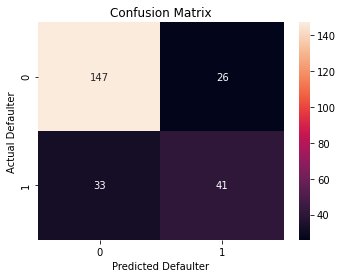

In [104]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(5.5,4))
sns.heatmap(cf_matrix, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Defaulter')
plt.xlabel('Predicted Defaulter')
plt.show()